In [3]:
import numpy as np
import matplotlib.pyplot as plt

[-3.37684447  0.59311872]
400


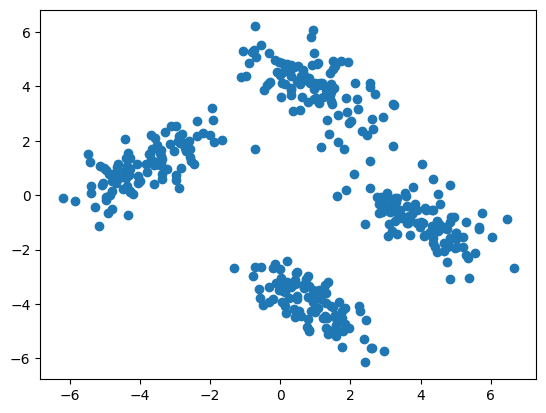

In [4]:
num_samples = 100
n1 = np.random.multivariate_normal([-4,1],[[0.9,0.6],[0.6,0.9]],size = num_samples)
n2 = np.random.multivariate_normal([1,4],[[0.9,-0.5],[-0.5,0.9]],size = num_samples)
n3 = np.random.multivariate_normal([4,-1],[[0.9,-0.5],[-0.5,0.7]],size = num_samples)
n4 = np.random.multivariate_normal([1,-4],[[0.8,-0.5],[-0.5,0.6]],size = num_samples)
print(n1[0])
X_data = np.vstack((n1,n2,n3,n4))
plt.scatter(X_data[:,0],X_data[:,1])
print(X_data.shape[0])

In [5]:
def k_means(X_data,k,iterations):
    initial_means = np.random.randint(0,X_data.shape[0],size = k)
    Y = np.zeros(X_data.shape[0],dtype=int)
    means = X_data[initial_means]
    for i in range(iterations):
        Y = np.argmin([np.linalg.norm(X_data-centeriod,axis = 1) for centeriod in means],axis = 0)
        for j in range(k):
            members = X_data[Y == j]
            means[j] = np.mean(members,axis = 0)
    return means,Y

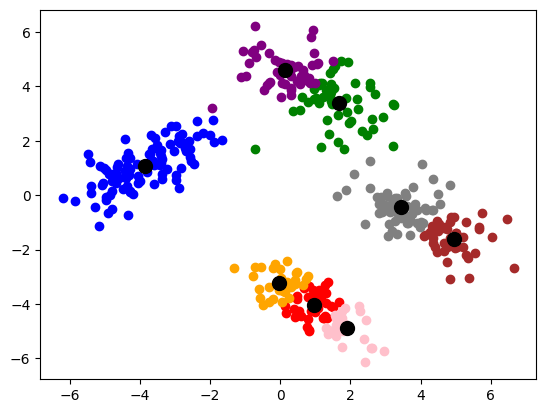

In [13]:
k = 8
means,Y_data = k_means(X_data,k,100)
data = np.hstack((X_data,Y_data.reshape(-1,1)))

def plot_data(data,means,k):
    colors = [
    'red',
    'blue',
    'green',
    'orange',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan'
    ]
    for j in range(k):
        plt.scatter(data[data[:,2] == j][:,0],data[data[:,2] == j][:,1],c = colors[j])
        plt.scatter(means[j][0],means[j][1],c = 'black',edgecolors='black',s = 100)

plot_data(data,means,k)

In [15]:
def loss_fn(data,means,k):
    loss = 0
    for i in range(k):
        cluster = data[data[:,2] == i][:,:2].copy()
        cluster -= means[i]
        cluster = np.linalg.norm(cluster,axis = 1)
        loss += np.sum(cluster**2)
    return loss
print(loss_fn(data,means,k))

7236.210344627157


379.64002408913615
518.918680821829


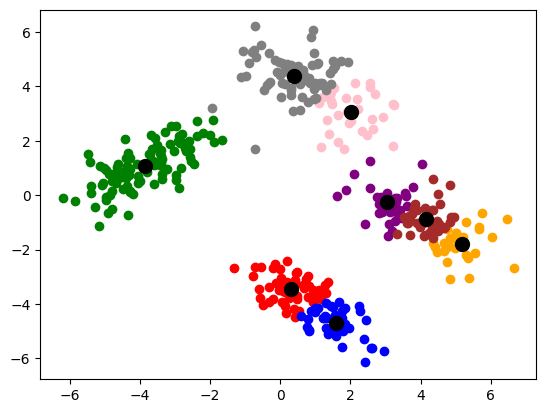

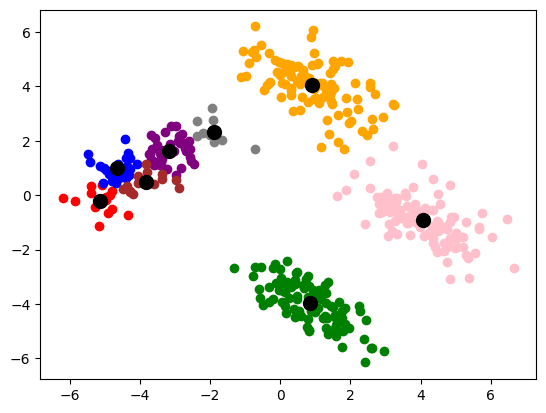

In [19]:
for i in range(2):
    k = 8
    means,Y_data = k_means(X_data,k,100)
    data = np.hstack((X_data,Y_data.reshape(-1,1)))
    print(loss_fn(data,means,k))
    plt.figure()
    plot_data(data,means,k)


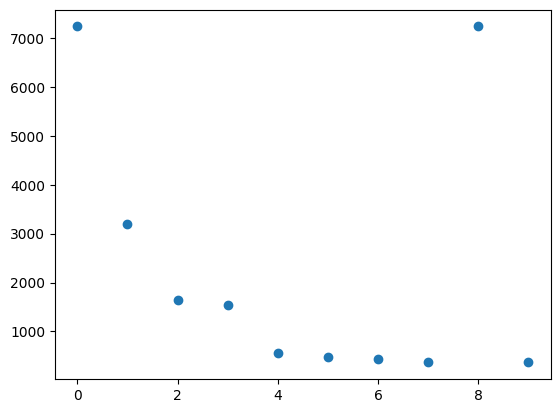

In [17]:
val = []
for i in range(10):
    k = i+1
    means,Y_data = k_means(X_data,k,100)
    data = np.hstack((X_data,Y_data.reshape(-1,1)))
    loss = loss_fn(data,means,k) 
    # plt.figure()
    # plot_data(data,means,k)
    val.append((i,loss))
    
ks, losses = zip(*val)
plt.scatter(ks, losses)

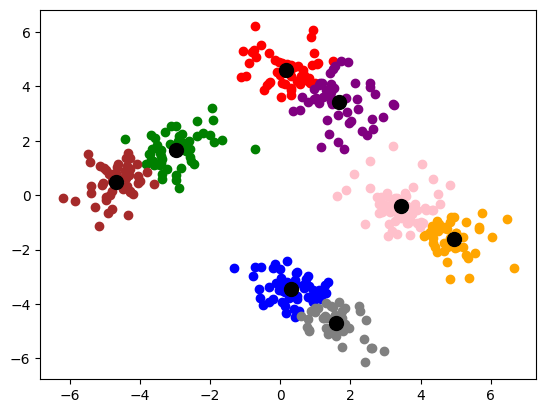

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k = 8
model = Pipeline([
    # ("scalar",StandardScaler()),
    ("kmoons",KMeans(n_clusters = k,random_state=42))
])
model.fit(X_data)
Y_data = model.named_steps["kmoons"].labels_
means = model.named_steps["kmoons"].cluster_centers_
data = np.hstack((X_data,Y_data.reshape(-1,1)))
plot_data(data,means,k)
